In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import utils
import importlib
import json
from tabulate import tabulate
#from adjustText import adjust_text
importlib.reload(utils)
pd.set_option('display.max_rows', None)

In [2]:
#Define the file paths
file_path_sample_a = r'Data\Task 5\sample a.TKA'
file_path_sample_b = r'Data\Task 5\sample b.TKA'


file_paths = [file_path_sample_a, file_path_sample_b]

#file path for background data
file_path_background = r'Data\Task 3\background 8.0 uS.TKA'

In [3]:
#import the background data
background_df = {}

background_df, total_time_background = utils.load_data(file_path_background)
print('Background Data succesfully imported.')

#Create a dictionary for the object data
object_dict = {}
#Load the data
for file_path in file_paths:
    #Load the data from the file path
    data, total_time = utils.load_data(file_path)

    #Get the name of the element from the file path
    object_name = file_path.split('\\')[-1].split('.')[0].strip().capitalize()
    object_dict[object_name] = data
    
    #Create the Normalized Counts per Second with the background spectrum subtracted, and clip it so there are no negative numbers
    object_dict[object_name]['Normalized Counts per Second'] = object_dict[object_name]['Counts per Second'] - background_df['Counts per Second']
    object_dict[object_name]['Normalized Counts per Second'] = object_dict[object_name]['Normalized Counts per Second'].clip(lower=1e-6)
    # for i in range(0, len(object_dict[object_name])):
    #     print(f"Subracting {object_dict[object_name].loc[i, 'Counts per Second']} - {background_df.loc[i, 'Counts per Second']}")
    # Identify rows where clipping occurred
    clipped_rows = object_dict[object_name][
    (object_dict[object_name]['Counts per Second'] - background_df['Counts per Second']) < 1e-6
]

    # Print the clipped rows
    if not clipped_rows.empty:
        print(f"Clipped entries for {object_name}:")
        print(clipped_rows)
        print(f'Data imported successfully for {object_name}.')

### For debugging ###
#print(object_dict)
#print(background_df)
#print(background_df.dtypes)
type(background_df)

Background Data succesfully imported.
Clipped entries for Sample a:
      Channel  Counts per Second  Counts  Normalized Counts per Second
0           1           0.000000       0                      0.000001
1           2           0.000000       0                      0.000001
2           3           0.000000       0                      0.000001
3868     3869           0.000000       0                      0.000001
3965     3966           0.003333       1                      0.000001
4193     4194           0.000000       0                      0.000001
4376     4377           0.000000       0                      0.000001
4411     4412           0.003333       1                      0.000001
4469     4470           0.016667       5                      0.000001
4471     4472           0.030000       9                      0.000001
4476     4477           0.043333      13                      0.000001
4495     4496           0.000000       0                      0.000001
4580     

pandas.core.frame.DataFrame

In [4]:
calibration_file_path = r'Data\calibration_data.json'
with open(calibration_file_path, 'r') as json_file:
    calibration_data = json.load(json_file)
slope = calibration_data['slope']
intercept = calibration_data['intercept']

def channel_to_energy(channel, slope=slope, intercept=intercept):
    return slope * channel + intercept

for object_name, data in object_dict.items():
    data['Energy (keV)'] = channel_to_energy(data['Channel'])

    ### For debugging ###
    # print(f'Data for {object_name}')
    # print(data.head())
    # print('=' * 50)

C:\Users\kearb\AppData\Local\Temp\ipykernel_22108\997719888.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


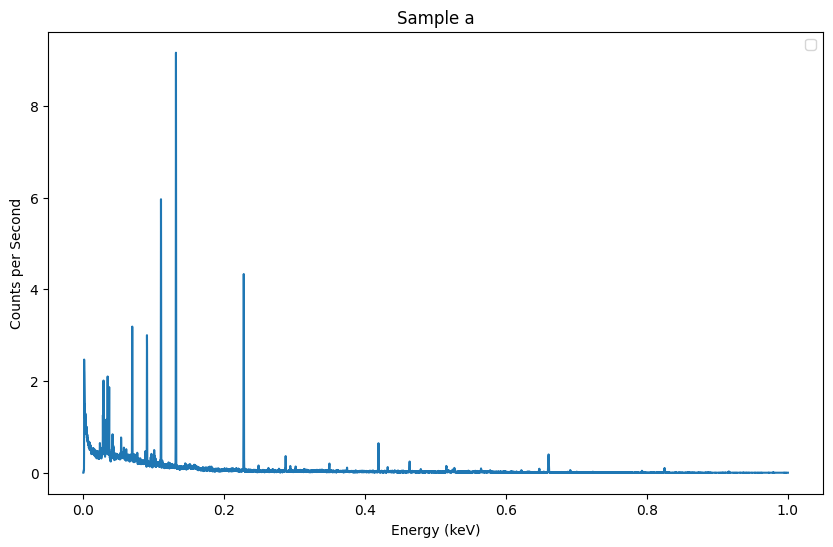

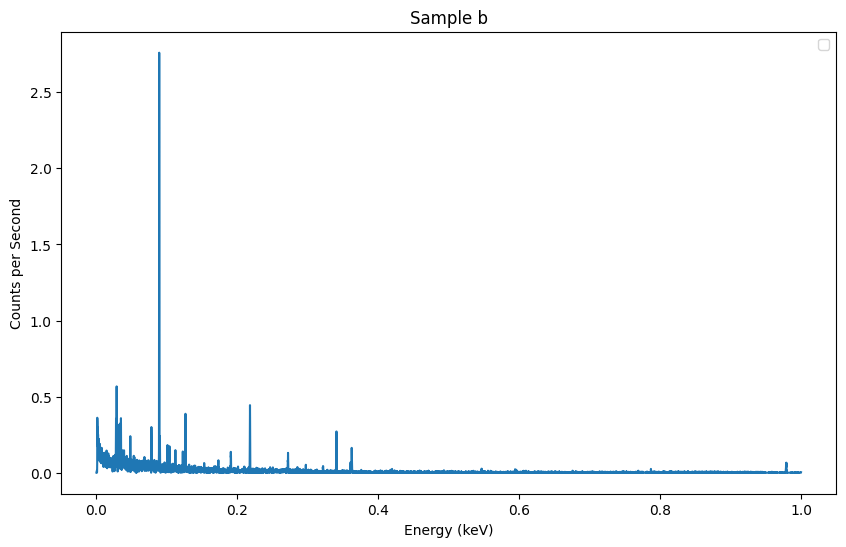

In [5]:
#Preliminary plots for visual data inspection
for object_name, data in object_dict.items():
    plt.figure(figsize=(10,6))
    plt.plot(data['Energy (keV)']/data['Energy (keV)'].max(), data['Normalized Counts per Second'])
    plt.xlabel('Energy (keV)')
    plt.ylabel('Counts per Second')
    if object_name == 'Filter dirt':
        plt.ylim(bottom=0, top=0.3)
    plt.title(object_name)
    plt.legend()
    plt.show()
    plt.close()

In [6]:
#Create the peaks_dict
peaks_dict = {}

#Call the peak_finder_simple function
for object_name, data in object_dict.items():
    peaks_dict = utils.find_peaks_simple(data=object_dict, start_channel=25, channel_step=50, cutoff_value = 0.25, threshold_factor=2)

#peaks_dict = utils.find_peaks_simple(data={'Background': background_dict}, start_channel=5, channel_step=25, cutoff_value = 0.013, threshold_factor=2)

# Remove the row where 'Energy (keV)' == 1765 for a specific sample
sample = 'Sample a'  # Replace with your sample name
peaks_dict[sample] = peaks_dict[sample][peaks_dict[sample]['Channel'] != 5408.0]


Data type: <class 'dict'>
Data keys: dict_keys(['Sample a', 'Sample b'])
Peak found for Sample a at channel 235 with value 2.010555555555556 (Max: 2.010555555555556, Avg: 0.7027777777777778)
Peak found for Sample a at channel 283 with value 2.098888888888889 (Max: 2.098888888888889, Avg: 0.7826)
Peak found for Sample a at channel 439 with value 0.768888888888889 (Max: 0.768888888888889, Avg: 0.3825888888888889)
Peak found for Sample a at channel 569 with value 3.1866666666666665 (Max: 3.1866666666666665, Avg: 0.5307777777777777)
Peak found for Sample a at channel 740 with value 2.9994444444444444 (Max: 2.9994444444444444, Avg: 0.41267777777777775)
Peak found for Sample a at channel 824 with value 0.495 (Max: 0.495, Avg: 0.2121333333333333)
Peak found for Sample a at channel 903 with value 5.964444444444444 (Max: 5.964444444444444, Avg: 0.5467111111111111)
Peak found for Sample a at channel 1077 with value 9.16 (Max: 9.16, Avg: 0.6110111111111112)
Peak found for Sample a at channel 1865

Filtered x values: [np.float64(76.9721620458371), np.float64(92.6462022833074), np.float64(186.0373586982346), np.float64(241.87612704422256), np.float64(295.10255535063214), np.float64(351.92095121146195), np.float64(609.2364451099328), np.float64(768.2626450192669), np.float64(1120.6020078574013), np.float64(1765.1969126233673)]
/nFiltered peak counts: [np.float64(2.010555555555556), np.float64(2.098888888888889), np.float64(3.1866666666666665), np.float64(2.9994444444444444), np.float64(5.964444444444444), np.float64(9.16), np.float64(4.333333333333334), np.float64(0.36277777777777775), np.float64(0.6433333333333333), np.float64(0.33166666666666667)]


C:\Users\kearb\AppData\Local\Temp\ipykernel_22108\2100473461.py:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


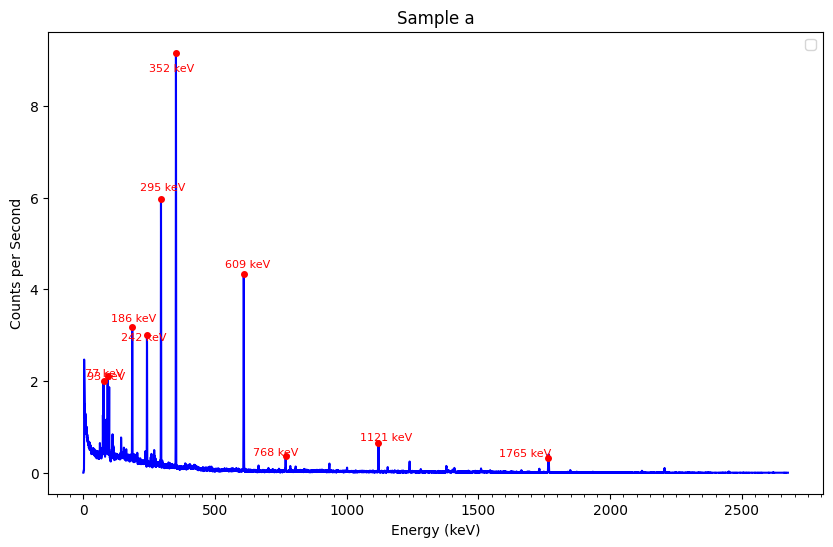

Filtered x values: [np.float64(76.9721620458371), np.float64(93.299287293202), np.float64(238.61070199474958), np.float64(338.20616600367543), np.float64(911.2882621861833)]
/nFiltered peak counts: [np.float64(0.5672222222222222), np.float64(0.3583333333333333), np.float64(2.7594444444444446), np.float64(0.3872222222222222), np.float64(0.27111111111111114)]


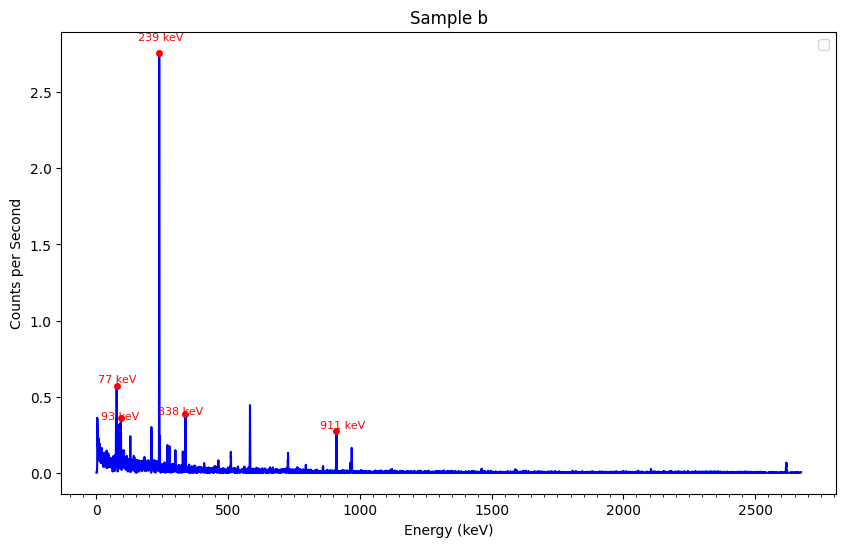

In [48]:
#Replot the data with the peaks
indices_to_ignore = [2, 5]


for object_name, data in object_dict.items():
    #First, extract the peak data
    peak_energies = peaks_dict[object_name]['Energy (keV)'].to_numpy()
    peak_counts = peaks_dict[object_name]['Normalized Counts per Second'].to_numpy()
    filtered_x = [i for i in peak_energies if peak_energies.tolist().index(i) not in indices_to_ignore]
    filtered_peak_counts = [y for y, x in zip(peak_counts, peak_energies) if peak_energies.tolist().index(x) not in indices_to_ignore]
    #convert peak channel to peak_energy
    print(f'Filtered x values: {filtered_x}')
    print(f'/nFiltered peak counts: {filtered_peak_counts}')

    #Create the plots
    plt.figure(figsize=(10,6))
    plt.plot(data['Energy (keV)'], data['Normalized Counts per Second'], color='blue')
    for i, (x, y) in enumerate(zip(filtered_x, filtered_peak_counts)):
        if y > 0.00:  # Only label significant peaks
            x_rounded = round(x, 0)
            offset_percentage = 0.025 if i % 2 == 0 else -0.05
            y_offset = y * offset_percentage
            x_offset = x * offset_percentage
            plt.text(x + x_offset, y + y_offset, f"{int(x_rounded)} keV", fontsize=8, ha='center', va='bottom', color='red')
            plt.plot(x, y, 'ro', markersize=4)
    # for x, y in zip(peak_energies, peak_counts):
    #     x_rounded = round(x, 0)
    #     if x_rounded == 186:
    #         plt.text(x, y+.015, f"{int(x_rounded)} keV", fontsize=8, ha='center', va='top', color='red', zorder=1)    
    #     else:
    #         if x_rounded == 242:
    #             plt.text(x, y-0.015, f"{int(x_rounded)} keV", fontsize=8, ha='center', va='bottom', color='red', zorder=1)
    #         else:
    #             plt.text(x, y+.005, f"{int(x_rounded)} keV", fontsize=8, ha='center', va='bottom', color='red', zorder=1)
    plt.xlabel('Energy (keV)')
    plt.ylabel('Counts per Second')
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(500))
    plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(50))
    if object_name == 'Filter dirt':
        plt.ylim(bottom=0, top=0.3)
    plt.title(object_name)
    plt.legend()
    plt.show()
    plt.close()


In [19]:
print(filtered_x)

[np.float64(76.9721620458371), np.float64(93.299287293202), np.float64(208.89533404454545), np.float64(238.61070199474958), np.float64(338.20616600367543), np.float64(583.1130447141489), np.float64(911.2882621861833)]


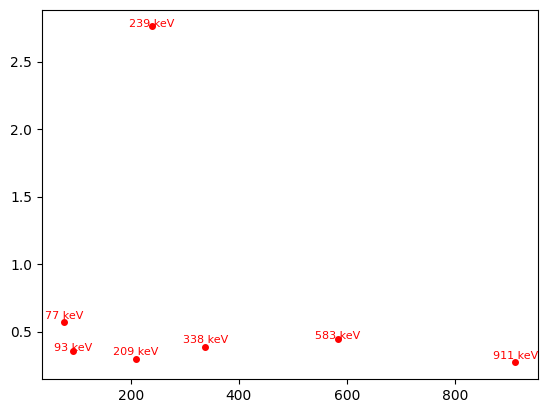

In [21]:
for i, (x, y) in enumerate(zip(filtered_x, filtered_peak_counts)):
        if y > 0.00:  # Only label significant peaks
            x_rounded = round(x, 0)
            offset = 0.015 if i % 2 == 0 else -0.015  # Alternate label positions
            plt.text(x, y + offset, f"{int(x_rounded)} keV", fontsize=8, ha='center', va='bottom', color='red')
            plt.plot(x, y, 'ro', markersize=4)